In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Optional: set style for Seaborn
sns.set_style("whitegrid")

In [ ]:
# Example file paths, replace with your actual files in Colab
population_df = pd.read_csv("population_scores.csv")
air_quality_df = pd.read_csv("air_quality_scores.csv")
rent_df = pd.read_csv("rent_scores.csv")
crime_df = pd.read_csv("crime_scores.csv")
healthcare_df = pd.read_csv("healthcare_scores.csv")
university_df = pd.read_csv("uni_scores.csv")
main_df = pd.read_csv("Main_City.csv")


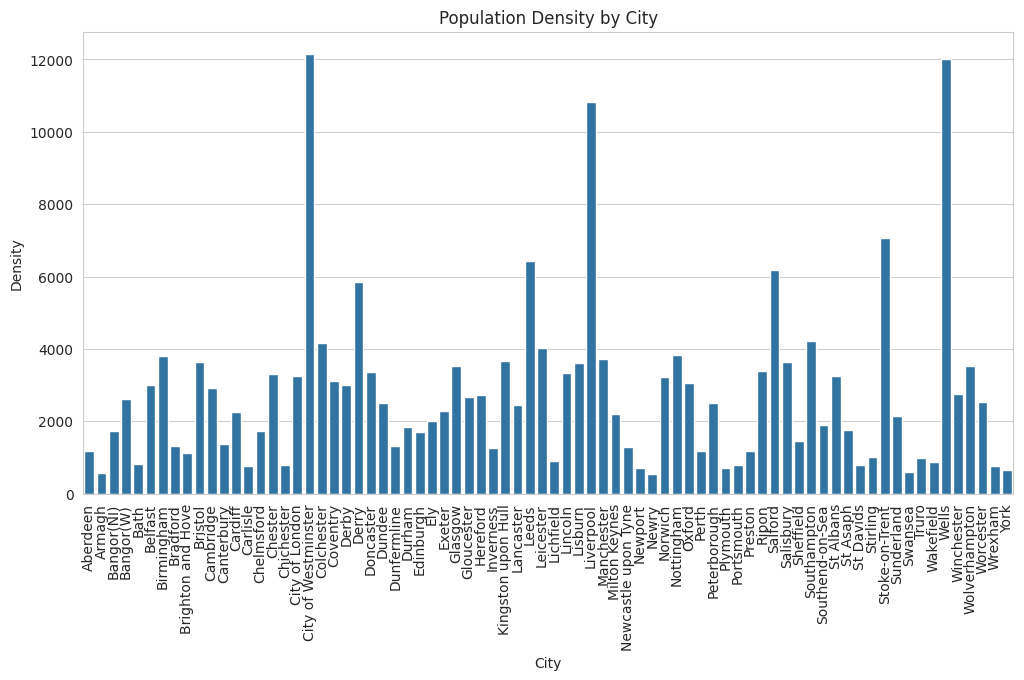

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='City', y='Density', data=population_df)
plt.xticks(rotation=90)
plt.title("Population Density by City")
plt.show()

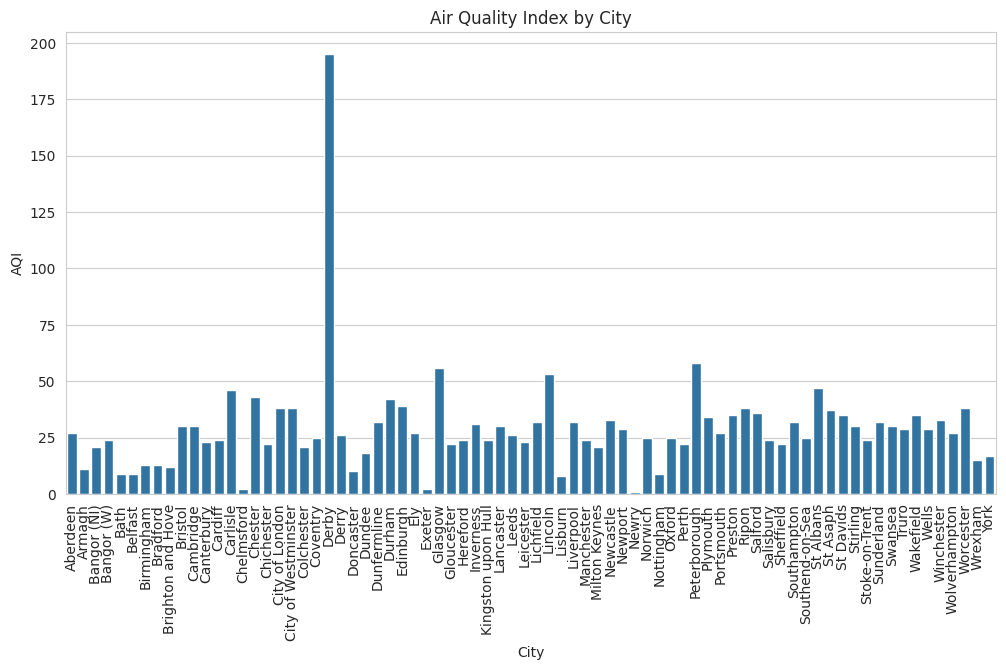

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='City', y='AQI', data=air_quality_df)
plt.xticks(rotation=90)
plt.title("Air Quality Index by City")
plt.show()

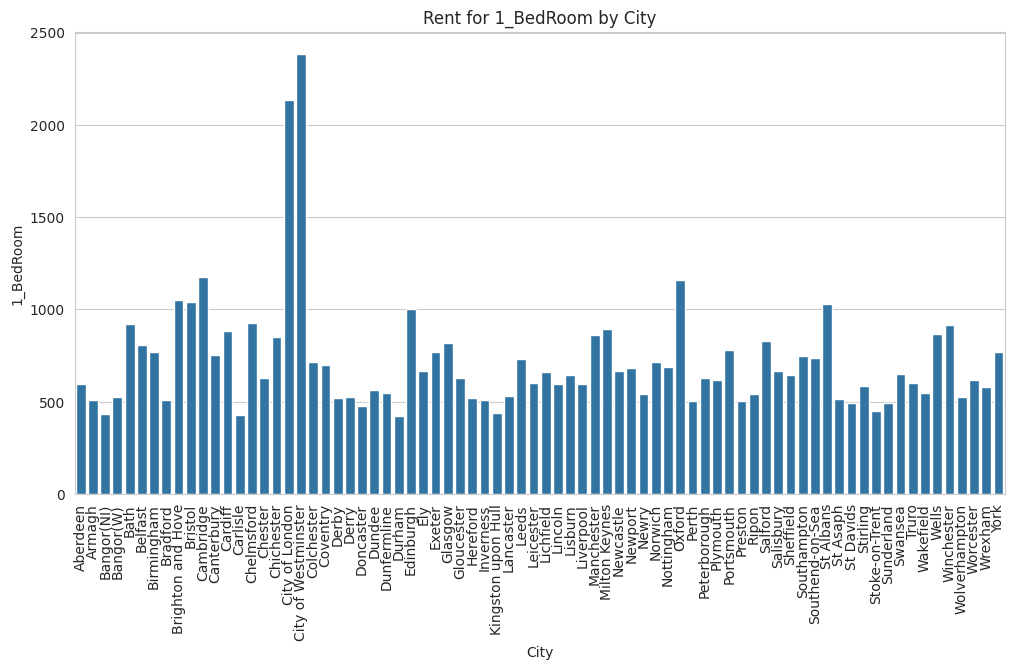

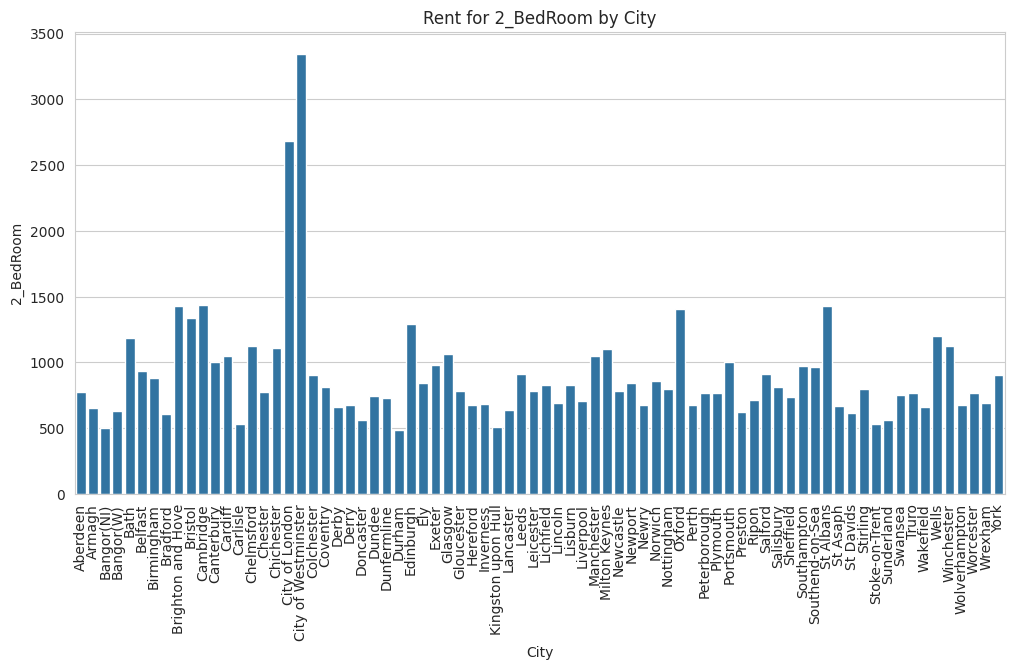

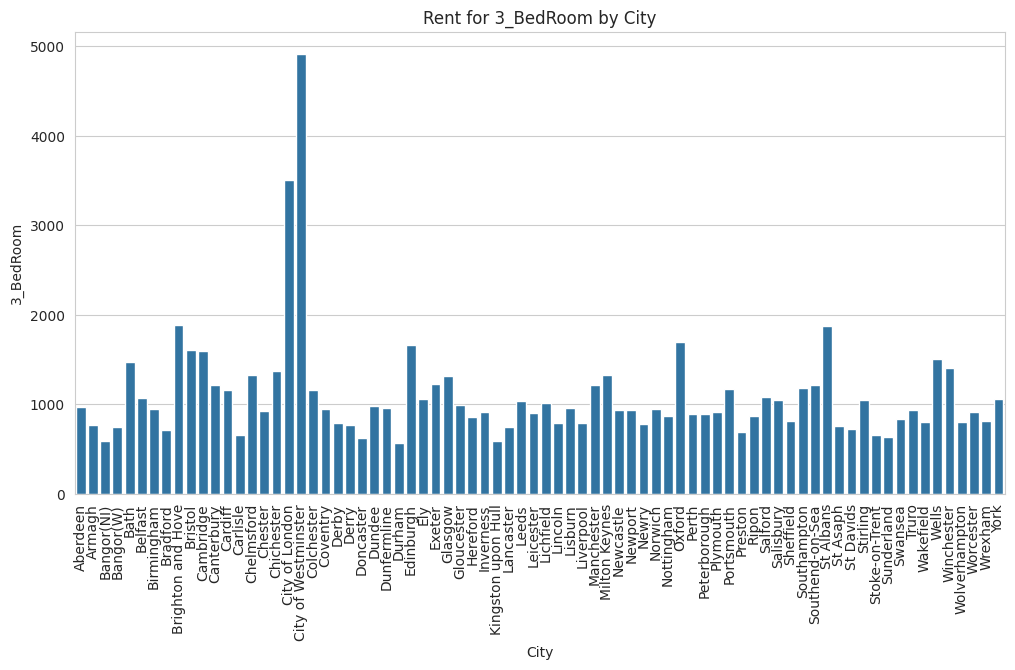

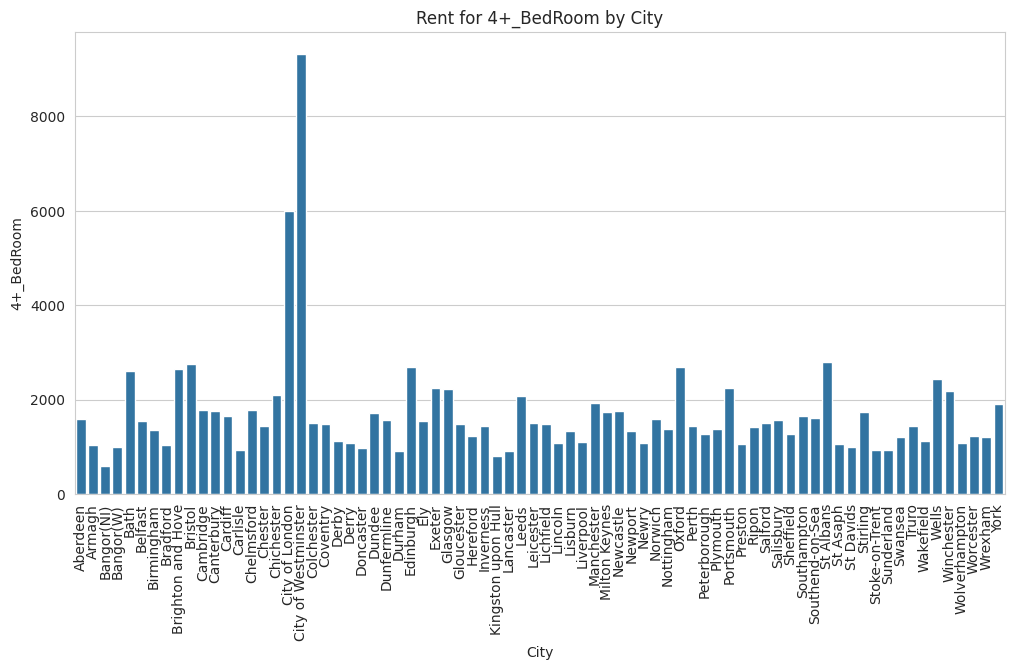

In [ ]:
rent_types = ["1_BedRoom", "2_BedRoom", "3_BedRoom", "4+_BedRoom"]

for col in rent_types:
    plt.figure(figsize=(12,6))
    sns.barplot(x='City', y=col, data=rent_df)
    plt.xticks(rotation=90)
    plt.title(f"Rent for {col} by City")
    plt.show()

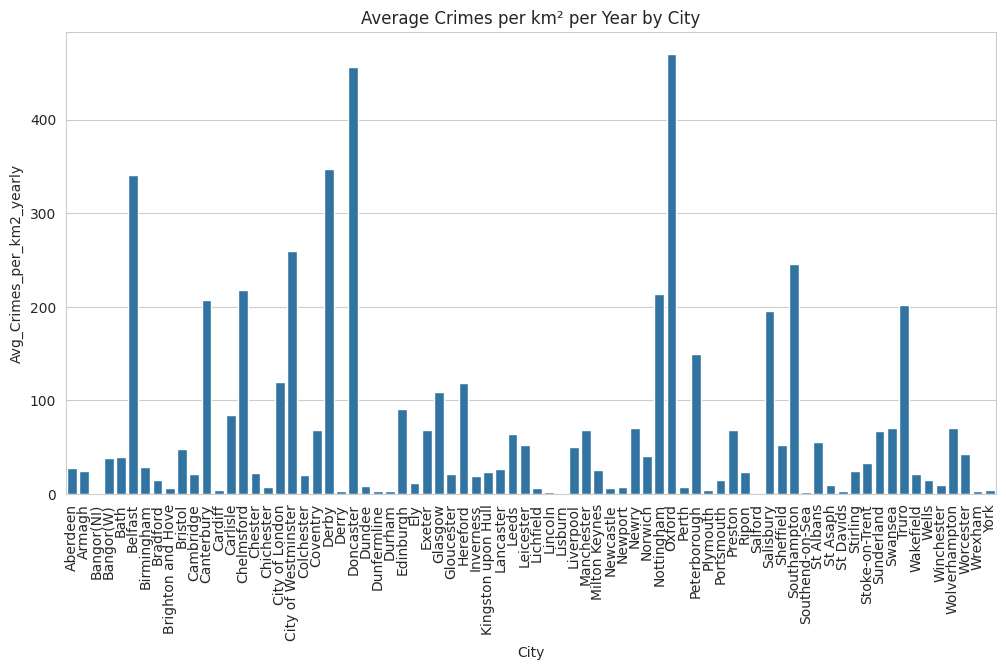

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='City', y='Avg_Crimes_per_km2_yearly', data=crime_df)
plt.xticks(rotation=90)
plt.title("Average Crimes per km² per Year by City")
plt.show()

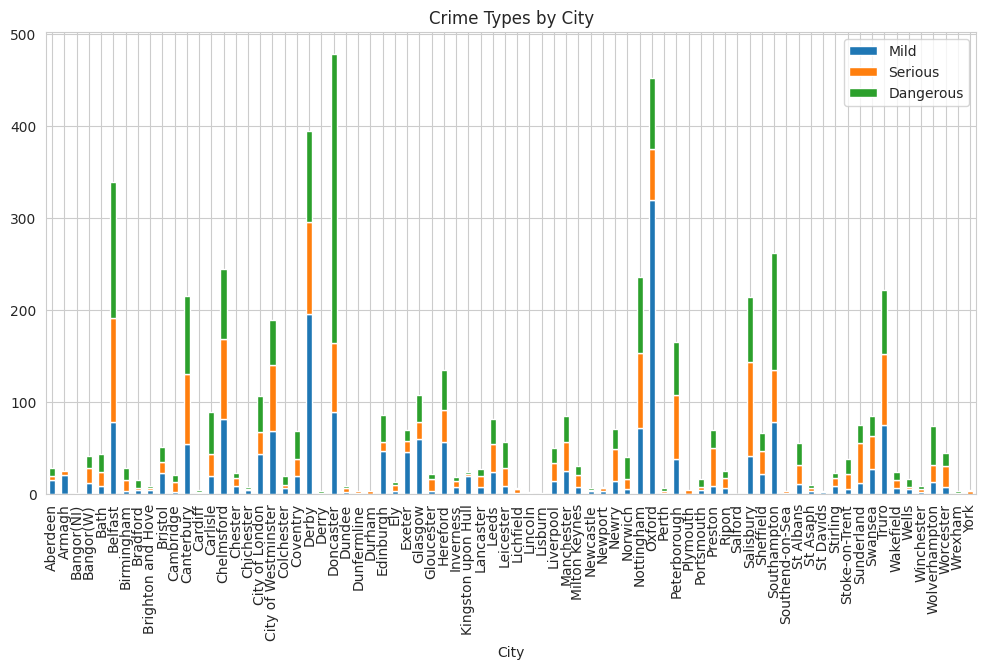

In [ ]:
crime_df.set_index('City')[['Mild','Serious','Dangerous']].plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Crime Types by City")
plt.show()

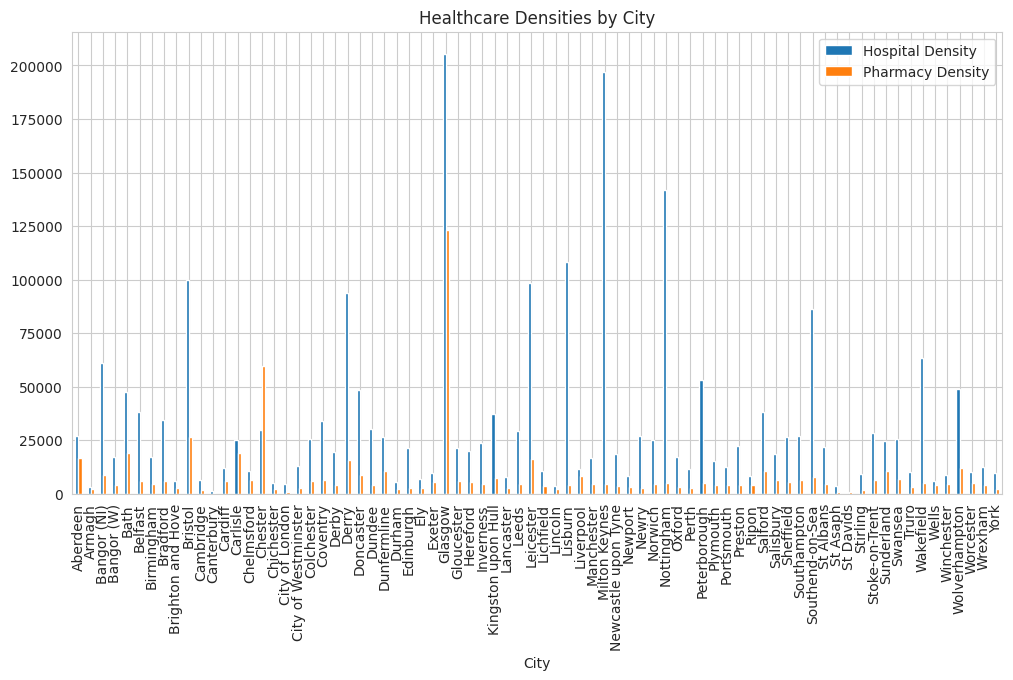

In [ ]:
healthcare_df.set_index('City')[['Hospital Density','Pharmacy Density']].plot(kind='bar', figsize=(12,6))
plt.title("Healthcare Densities by City")
plt.show()

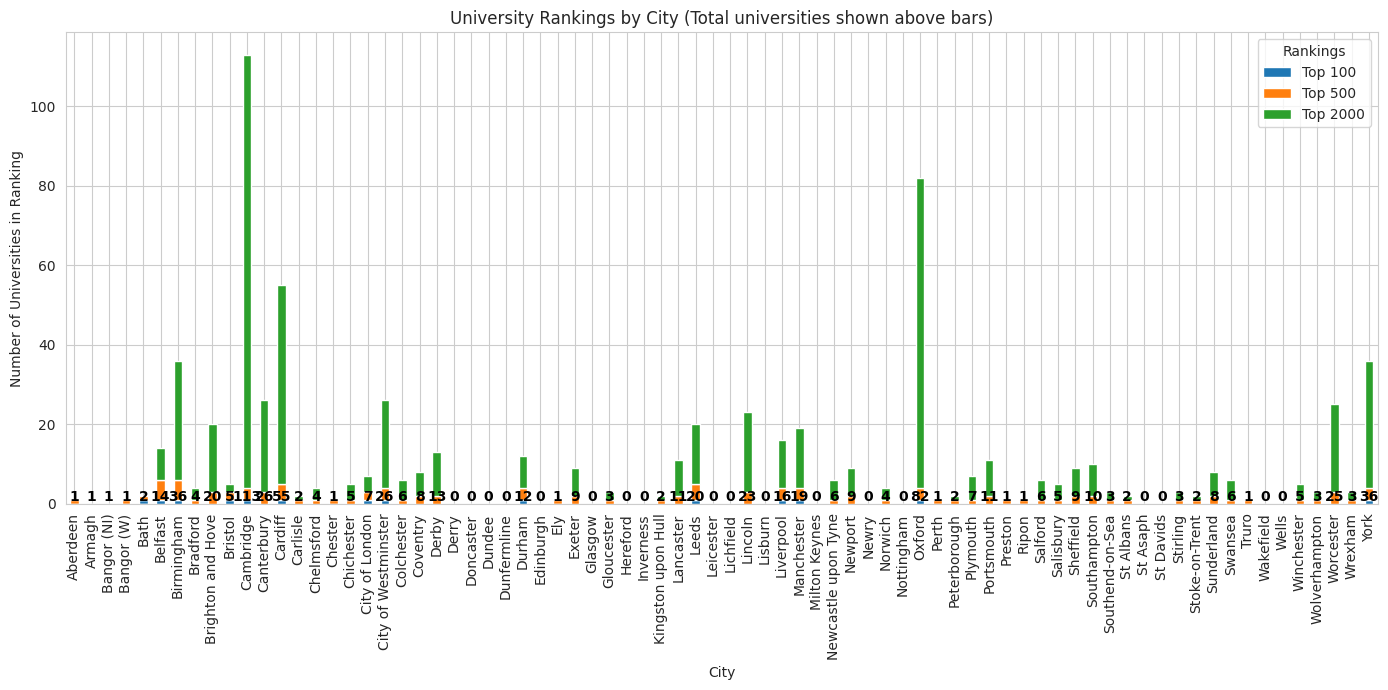

In [ ]:
# Set index
df = university_df.set_index('City')

# Only plot rankings, not total universities
rank_cols = ['Top 100', 'Top 500', 'Top 2000']

ax = df[rank_cols].plot(kind='bar', stacked=True, figsize=(14,7), color=['#1f77b4','#ff7f0e','#2ca02c'])

# Add total universities as text in front of bar
for i, total in enumerate(df['Universities']):
    ax.text(i, 0, f"{total}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=10)

plt.ylabel("Number of Universities in Ranking")
plt.title("University Rankings by City (Total universities shown above bars)")
plt.xticks(rotation=90)
plt.legend(title="Rankings")
plt.tight_layout()
plt.show()

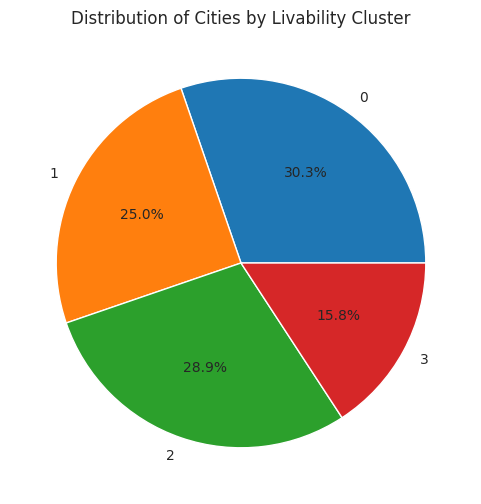

In [ ]:
import matplotlib.pyplot as plt

# Count how many cities are in each cluster
cluster_counts = main_df['Livabitlity'].value_counts().sort_index()  # Ensure 0,1,2,3 order

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    cluster_counts,
    labels=cluster_counts.index,
    autopct='%1.1f%%',
    colors=['#1f77b4','#ff7f0e','#2ca02c','#d62728']  # Optional custom colors
)
plt.title("Distribution of Cities by Livability Cluster")
plt.show()

In [ ]:
fig = px.bar(main_df, x='City', y='Scores', color='Livabitlity', hover_data=['Population','Rent','Safety','Air','Healthcare','University'])
fig.show()